<a href="https://colab.research.google.com/github/wcharlesknight/Analysis_Index_Asset_Flows/blob/master/Final_Project_Charlie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import os
import decimal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)




# I uploaded as an excel file since it did not upload '%'
df = pd.read_excel('Final Project.xlsx')

# First I needed to turn all decimals into whole percentages 
df['US Fixed Income'] = df['US Fixed Income'].apply(lambda x: x*100) 
df['US Equity'] = df['US Equity'].apply(lambda x: x*100)
df['EU Equity'] = df['EU Equity'].apply(lambda x: x*100)
df['EU Fixed Income'] = df['EU Fixed Income'].apply(lambda x: x*100)
df['China Equity'] = df['China Equity'].apply(lambda x: x*100)
df['China Fixed Income'] = df['China Fixed Income'].apply(lambda x: x*100)
df['MSCI ACWI'] = df['MSCI ACWI'].apply(lambda x: x*100)
df['Bloomberg Agg'] = df['Bloomberg Agg'].apply(lambda x: x*100)
df['MSCI Euro '] = df['MSCI Euro '].apply(lambda x: x*100)
df['MSCI China  '] = df['MSCI China'].apply(lambda x: x*100)
df['S&P 500'] = df['S&P 500'].apply(lambda x: x*100)


print(df[1:15]) #showing the top 15 of the dataframe


      Date  US Fixed Income  EU Equity  ...  MSCI China  S&P 500  MSCI China  
1   Sep-19         1.306210  -3.017328  ...   -0.047290   1.6983       -4.7290
2   Jun-19         0.823038  -3.640569  ...   -0.040158   4.3038       -4.0158
3   Mar-19         0.889288  -4.953785  ...    0.176914  13.6480       17.6914
4   Dec-18        -0.417358  -1.820014  ...   -0.107311 -13.5198      -10.7311
5   Sep-18         1.264494  -1.862680  ...   -0.075081   7.7108       -7.5081
6   Jun-18        -0.178582  -4.377317  ...   -0.035021   3.4339       -3.5021
7   Mar-18         0.348972  -0.195834  ...    0.018190  -0.7591        1.8190
8   Dec-17         1.495149  -0.121436  ...    0.076166   6.6448        7.6166
9   Sep-17         1.869558   0.925577  ...    0.146562   4.4804       14.6562
10  Jun-17         0.851121   0.549529  ...    0.105715   3.0882       10.5715
11  Mar-17         0.753064  -3.306551  ...    0.129264   6.0661       12.9264
12  Dec-16         1.492984  -1.664668  ...   -0.070

In [5]:
# Create Asset dataframe and index dataframe to use later

r_us_data = df[['Date','US Equity','US Fixed Income','S&P 500']]
r_asset_flows = df[['Date','US Equity','US Fixed Income','EU Equity','EU Fixed Income','China Equity','China Fixed Income']]
r_indices = df[['Date','MSCI ACWI','Bloomberg Agg','MSCI Euro ','MSCI China  ','S&P 500']]

#needed to reverse the order for graphical purposes. 2005 left to 2019 on the right.
asset_flows = r_asset_flows.reindex(index=r_asset_flows.index[::-1]) 
us_data = r_us_data.reindex(index=r_us_data.index[::-1])
indices = r_indices.reindex(index=r_indices.index[::-1])
r_df = df.reindex(index=df.index[::-1])

# I needed to do this code so I could graph them together on a line graph. I realized later that there was 
# anoterh way to do this.
melted_flows = pd.melt(asset_flows,id_vars=['Date'],var_name='Strategies')
melted_us_data = pd.melt(us_data, id_vars=['Date'], var_name='Asset')


# making new dataframe of cumulative numbers. i.e. adding percentage after each row to show in graph. 
d = us_data['Date']
s = us_data['S&P 500']
c = indices['MSCI China  ']
e = indices['MSCI Euro ']
w = indices['MSCI ACWI']

wp = pd.Series(w)
ep = pd.Series(e)
cp = pd.Series(c)
sp = pd.Series(s)
dp = pd.Series(d)
spc = sp.cumsum() # sum all the different series up to later add to df as a seperate column
cpc = cp.cumsum() 
epc = ep.cumsum() 
wpc = wp.cumsum() 

cumu = {'Date' : dp, 'S&P 500': spc, }

cumulative_index = pd.DataFrame(cumu) #create new dataframe for cumulative returns
# and then add the below indices to it one by one

cumulative_index['MSCI China'] = cpc # graph an index like we normally see it
cumulative_index['MSCI Euro'] = epc
cumulative_index['MSCI World'] = wpc

melted_cumulative = pd.melt(cumulative_index, id_vars=['Date'], var_name='Index') #melted to graph together
print(cumulative_index.head())






      Date  S&P 500  MSCI China  MSCI Euro  MSCI World
58  Jun-05   1.3686      5.6216    -1.5124     -0.0264
57  Sep-05   4.9735     19.7983     6.0016      7.1645
56  Dec-05   7.0611     19.4555     8.4889     10.1671
55  Mar-06  11.2686     40.8828    20.8449     16.6784
54  Jun-06   9.8280     42.7593    22.2123     15.2584


In [6]:
# Organize the different columns to easily read and call them

# Name all of the indices
world_stock_index = df['MSCI ACWI']
fixed_income_index = df['Bloomberg Agg']
usequity_index = df['S&P 500']
chinaequity_index = df['MSCI China  ']
euequity_index = df['MSCI Euro ']

# Name all of the asset flows
us_equity_flows = df['US Equity']
us_fi_flows = df['US Fixed Income']
china_equity_flows = df['China Equity']
china_fi_flows = df['China Fixed Income']
eu_fi_flows = df['EU Fixed Income']
eu_equity_flows = df['EU Fixed Income']

# Measure sums of asset flows
cumulative_china_equity = china_equity_flows.sum()
cumulative_us_equity = us_equity_flows.sum() 
cumulative_eu_equity = eu_equity_flows.sum()
cumulative_china_fi = china_fi_flows.sum()
cumulative_us_fi = us_fi_flows.sum()
cumulative_eu_fi = eu_fi_flows.sum()

print('Equity Strategies 2005-2019 \n')

print(f'The net percentage flow of all US Equity is {cumulative_us_equity}%')
print(f'The net percentage flow of all Chinese Equity is {cumulative_china_equity}%')
print(f'The net percentage flow of all EU Equity is {cumulative_eu_equity}% \n')

print('Fixed Income Strategies 2005-2019 \n')

print(f'The net percentage flow of all US Fixed Income is {cumulative_us_fi}%')
print(f'The net percentage flow of all China Fixed Income is {cumulative_china_fi}%')
print(f'The net percentage flow of all EU Fixed Income is {cumulative_eu_fi}%')

Equity Strategies 2005-2019 

The net percentage flow of all US Equity is -45.16148012873901%
The net percentage flow of all Chinese Equity is 110.4553795978673%
The net percentage flow of all EU Equity is 101.74032516371462% 

Fixed Income Strategies 2005-2019 

The net percentage flow of all US Fixed Income is 43.3596498514872%
The net percentage flow of all China Fixed Income is 174.3302075965906%
The net percentage flow of all EU Fixed Income is 101.74032516371462%


In [7]:
# Look at average return of indices 

average_world_stock = world_stock_index.mean()
average_world_fi = fixed_income_index.mean()
average_us_stock = usequity_index.mean()
average_china_stock = chinaequity_index.mean()
average_eu_stock = euequity_index.mean()


print('Average Returns of Indices 2005-2019 \n')
print(f'The average return of the MSCI world equity index is {average_world_stock}%')
print(f'The average return of the Bloomberg Agg world fixed income index is {average_world_fi}%')
print(f'The average return of the S&P 500 US equity index is {average_us_stock}%')
print(f'The average return of the MSCI China equity index is {average_china_stock}%')
print(f'The average return of the MSCI Euro equity index is {average_eu_stock}%')


Average Returns of Indices 2005-2019 

The average return of the MSCI world equity index is 1.5253305084745763%
The average return of the Bloomberg Agg world fixed income index is 0.8689271186440677%
The average return of the S&P 500 US equity index is 2.5292644067796615%
The average return of the MSCI China equity index is 3.5611525423728816%
The average return of the MSCI Euro equity index is 1.5421118644067797%


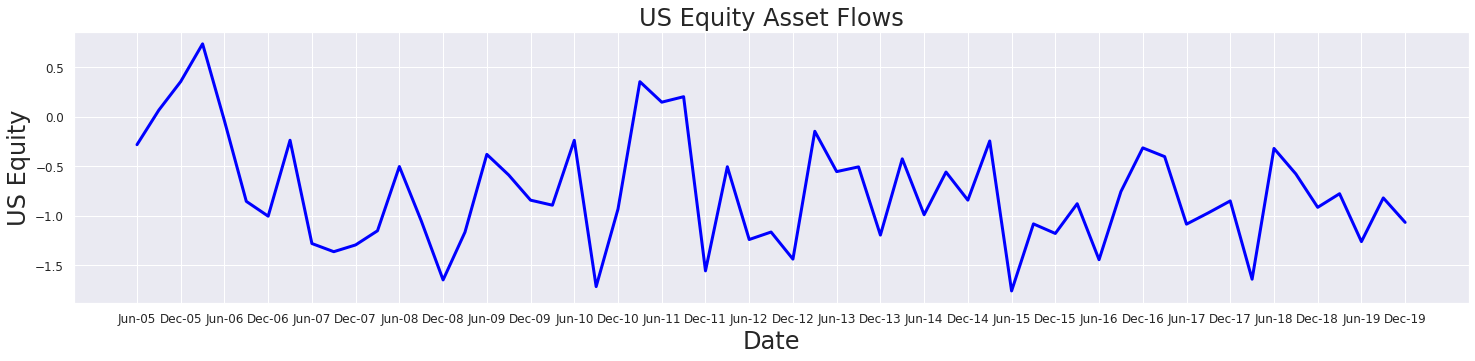

In [8]:
# to start, just doing us equity on its own

sns.set(font_scale=2) #setting size of font
fig, (ax1) = plt.subplots(ncols=1, figsize=(25, 5)) #Used Matplot to adjust the size
us = sns.lineplot(x='Date', y='US Equity', data=r_df, ci=None, sort=False, ax=ax1,linewidth=3,color='blue')

plt.title('US Equity Asset Flows') #title

us.tick_params(labelsize=12) #set tick font size
xticks = us.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)




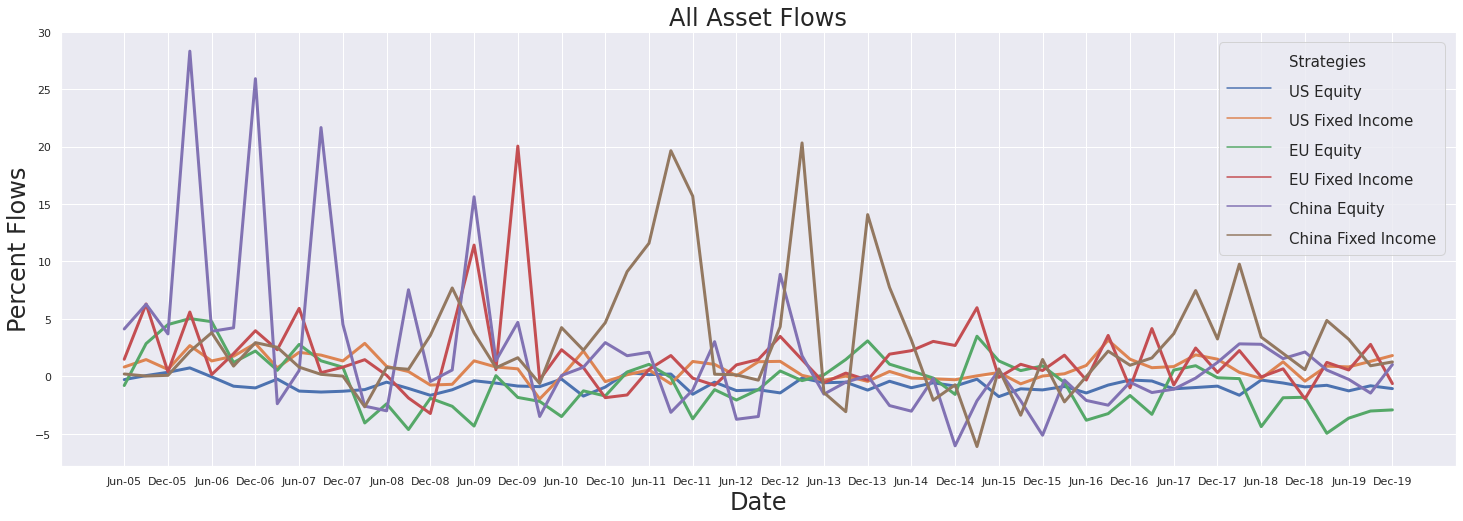

In [9]:
# Plot all the asset flows together 
fig, (ax2) = plt.subplots(ncols=1, figsize=(25, 8)) 
all_flows = sns.lineplot(x='Date', y='value', hue='Strategies',data=melted_flows, ax=ax2, sort=False, linewidth=3) #use the melted flow df to make a line plot of all asset flows

plt.title('All Asset Flows')
#set legend size
plt.setp(all_flows.get_legend().get_texts(), fontsize='15') 
plt.setp(all_flows.get_legend().get_title(), fontsize='25') 

#set labels since I used the melted way of putting them on same line graph
all_flows.set(xlabel='Date', ylabel='Percent Flows')


all_flows.tick_params(labelsize=11) #set tick font size
ticks = all_flows.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(ticks)):
    if i%2==1:
        ticks[i].set_visible(False)

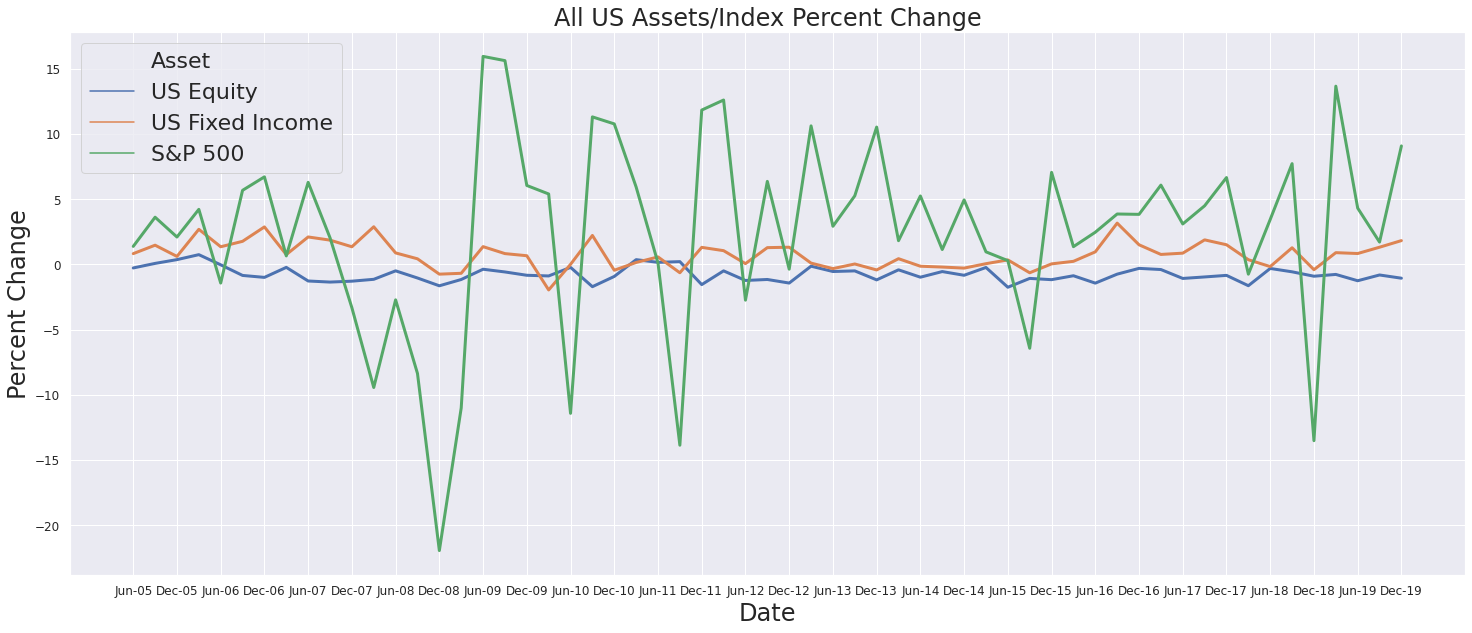

In [10]:
# A look at any correlation among US asset flows and index returns

fig, (ax3) = plt.subplots(ncols=1, figsize=(25, 10))
flow_index = sns.lineplot(x='Date', y='value', hue='Asset',data=melted_us_data, sort=False, ax=ax3, linewidth=3) #use the melted flow df to make a line plot of all asset flows

flow_index.set(xlabel='Date', ylabel='Percent Change',title='All US Assets/Index Percent Change')

flow_index.tick_params(labelsize=12) #set tick font size
fticks = flow_index.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(fticks)):
    if i%2==1:
        fticks[i].set_visible(False)


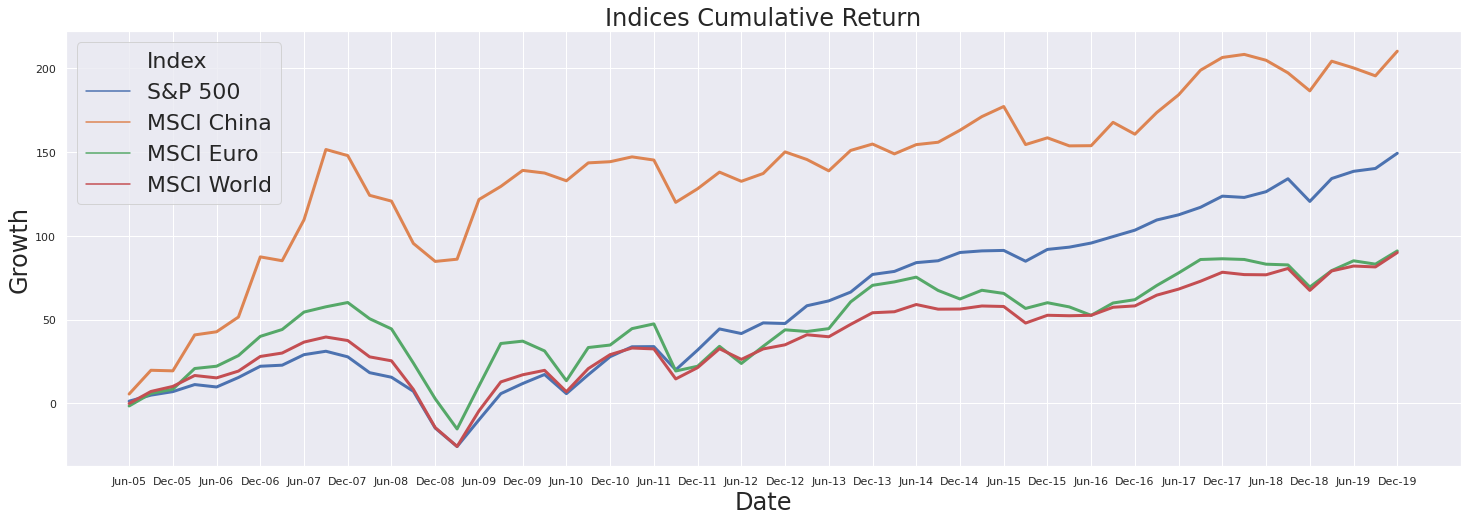

In [11]:
# line graph of all the major stock indices together
fig, (ax4) = plt.subplots(ncols=1, figsize=(25, 8))
index_returns = sns.lineplot(x="Date", y='value', hue='Index', data=melted_cumulative, ax=ax4, sort=False,linewidth=3)

index_returns.set(xlabel='Date', ylabel='Growth',title='Indices Cumulative Return')

index_returns.tick_params(labelsize=11) #set tick font size
eticks = index_returns.xaxis.get_major_ticks() # This is to make the x-axis labels readable
for i in range(len(eticks)):
  if i%2==1:
    eticks[i].set_visible(False)





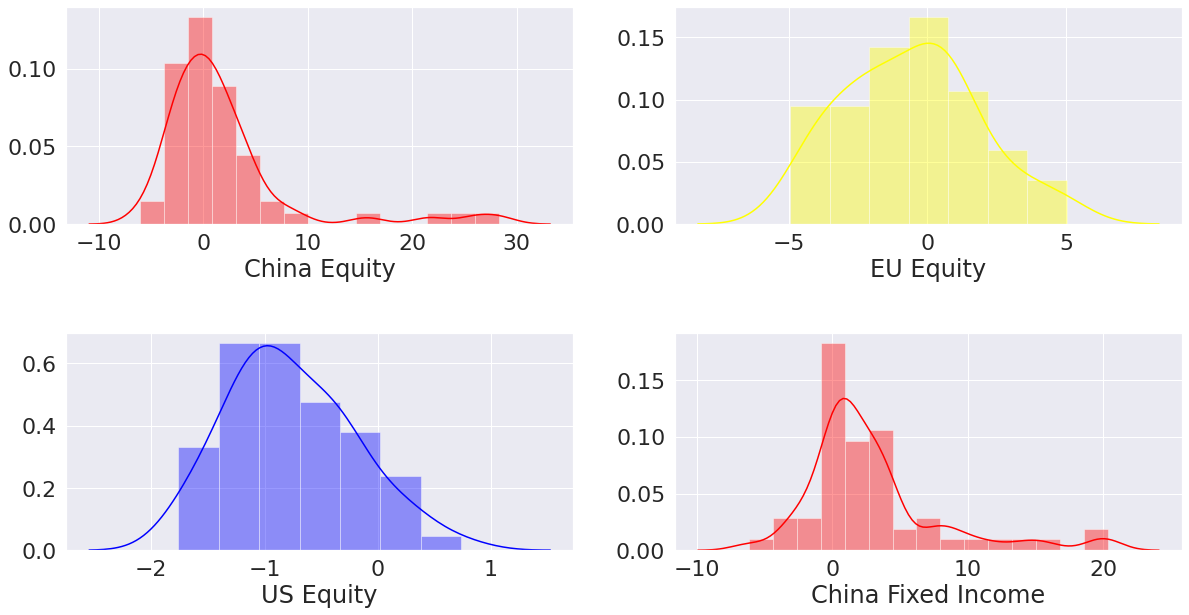

In [22]:
#finally a histogram of percentage flows


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))


a = r_asset_flows['China Equity']
b = r_asset_flows['EU Equity']
c = r_asset_flows['US Equity']
d = r_asset_flows['China Fixed Income']

plt.subplots_adjust(hspace = 0.5) #adjust the space between histograms


china = sns.distplot(a, bins=None, hist=True, kde=True, color='red', ax=ax1)
eu = sns.distplot(b, bins=None, hist=True, kde=True, color='yellow', ax=ax2)
usa = sns.distplot(c, bins=None, hist=True, kde=True, color='blue', ax=ax3)
cfi = sns.distplot(d, bins=None, hist=True, kde=True, color='red', ax=ax4)
